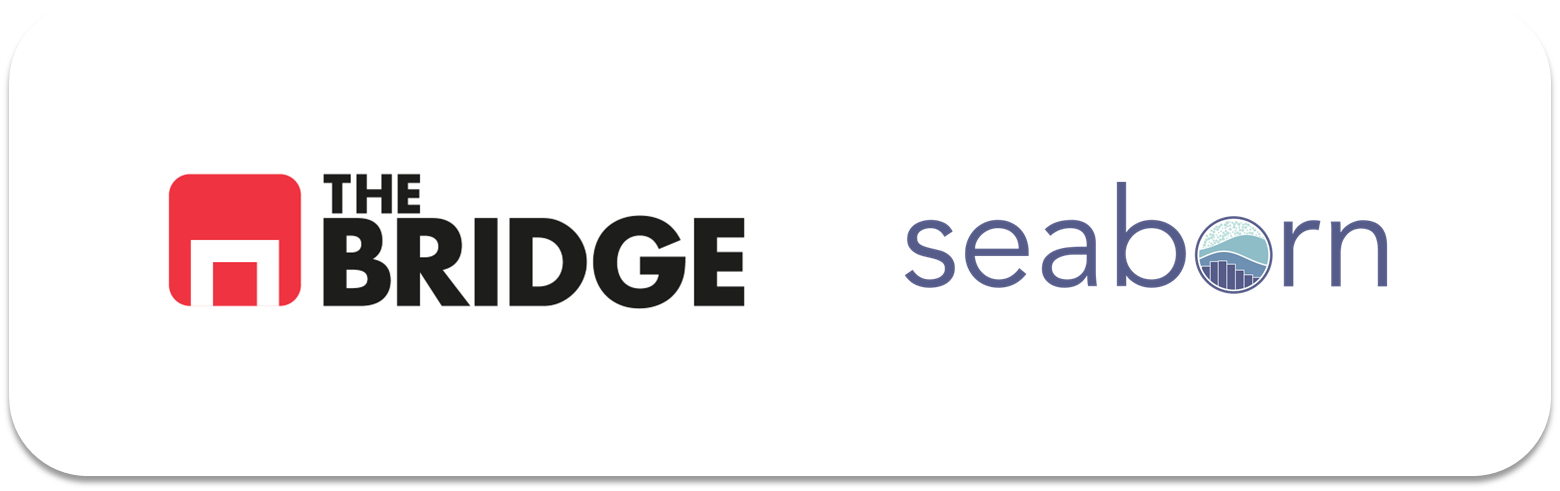

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [3]:
df = pd.read_csv("./data/california_cities.csv")
df = df.dropna()
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

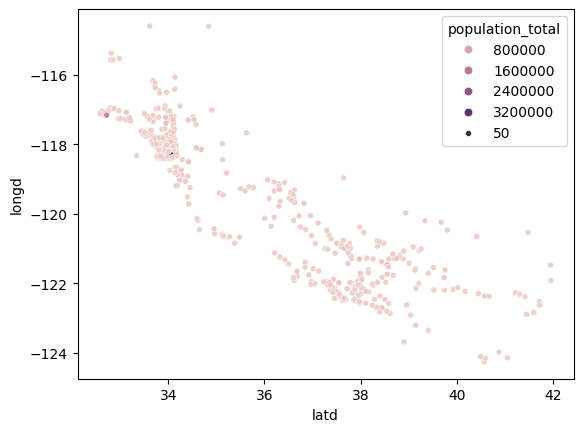

In [13]:
# Los 6 argumentos junto al nombre de la función

def scatter_custom(df, x_col, y_col, cat_col=None, size_param=50, scale=1):

# --- Control de errores ---
    # 1. Evita que cualquiera de las columnas que le pasemos
    #    al llamar a la función, no se encuentren en el DataFrame

    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError("Las columnas numéricas deben existir en el dataframe")

    # 2. Evita que las columnas numericas que le pasamos sean iguales

    if x_col == y_col:
        raise ValueError("Las columnas numéricas deben ser distintas")

    # 3. En caso de que le pasemos una columna categórica, evita que esta
    #    no se encuentre en el DataFrame

    if cat_col is not None and cat_col not in df.columns:
        raise ValueError("La columna categórica no existe en el dataframe")

# --- Cálculo del tamaño de las bolas ---
    # isinstance significa "size_param es en este caso un string"
    if isinstance(size_param, str):
        if size_param not in df.columns:
            raise ValueError("La columna usada para el tamaño no existe")
        sizes = df[size_param] * scale
    else:
        sizes = size_param

# --- Gráfico ---
    # En caso de que la 3era variable (categórica), sea algo:
    if cat_col is not None:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=cat_col,
            # El parámetro en sns se llama size por eso se iguala a nuestra variable sizes
            size=sizes,
            # Traducción literal: "sizes coge el valor máximo y mínimo si "sizes" es una serie de pandas, si no nada"
            sizes=(sizes.min(), sizes.max()) if isinstance(sizes, pd.Series) else None
        )
    # Si dicha 3era variable es "nada"
    else:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            size=sizes
        )

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

scatter_custom(df, "latd", "longd", "population_total")

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

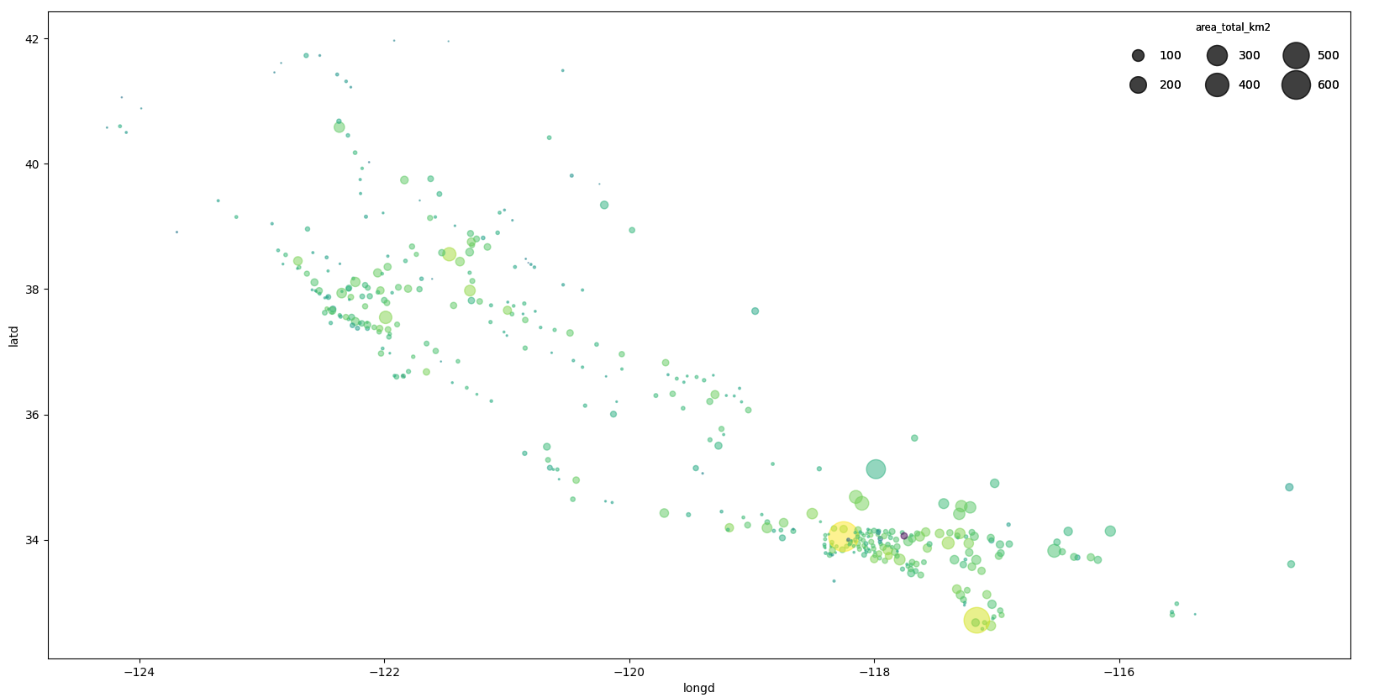

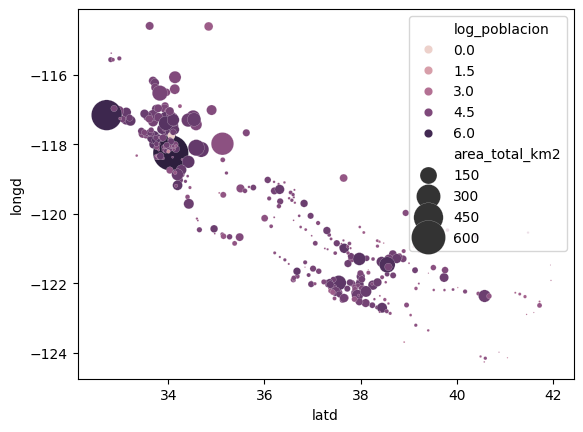

In [19]:
df["log_poblacion"] = np.log10(df["population_total"])

def scatter_custom(df, x_col, y_col, cat_col=None, size_param=50, scale=1):

    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError("Las columnas numéricas deben existir en el dataframe")

    if x_col == y_col:
        raise ValueError("Las columnas numéricas deben ser distintas")

    if cat_col is not None and cat_col not in df.columns:
        raise ValueError("La columna categórica no existe en el dataframe")

    if isinstance(size_param, str):
        if size_param not in df.columns:
            raise ValueError("La columna usada para el tamaño no existe")
        sizes = df[size_param] * scale
    else:
        sizes = size_param

    if cat_col is not None:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=cat_col,
            size=sizes,
            sizes=(sizes.min(), sizes.max()) if isinstance(sizes, pd.Series) else None
        )
    else:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            size=sizes
        )

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

scatter_custom(df, "latd", "longd", "log_poblacion", "area_total_km2", 1/2)

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)